In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [2]:
data = pd.read_csv('input/merged.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 7 columns):
Date         9534 non-null object
Open         9533 non-null float64
High         9533 non-null float64
Low          9533 non-null float64
Close        9533 non-null float64
Adj Close    9533 non-null float64
Volume       9533 non-null float64
dtypes: float64(6), object(1)
memory usage: 521.5+ KB


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9.533000e+03
mean,25.227877,25.466292,24.976619,25.227377,23.662560,8.787443e+07
std,45.035748,45.402303,44.669427,45.046409,43.507792,8.695797e+07
min,0.198661,0.198661,0.196429,0.196429,0.158904,3.472000e+05
25%,1.044643,1.067857,1.026786,1.046429,0.916642,3.410960e+07
50%,1.656250,1.687500,1.625000,1.658571,1.435101,5.989760e+07
75%,24.788572,25.111429,24.321428,24.750000,21.934832,1.099028e+08
max,228.990005,230.000000,226.630005,229.279999,229.279999,1.855410e+09


In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

/home/alperen/anaconda3/envs/sparklr/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alperen/anaconda3/envs/sparklr/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


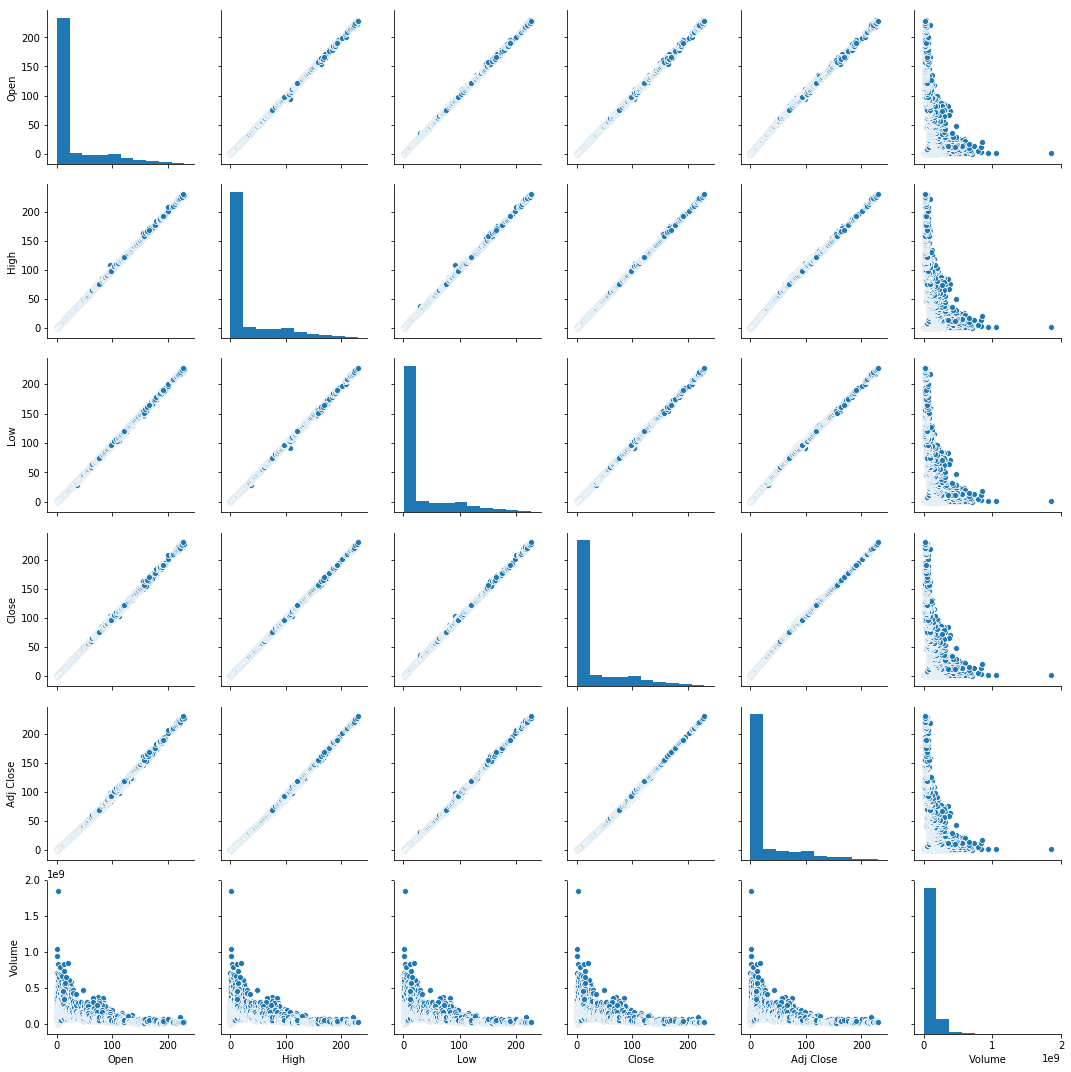

In [5]:
sns.pairplot(data)

In [23]:
data=data.dropna()

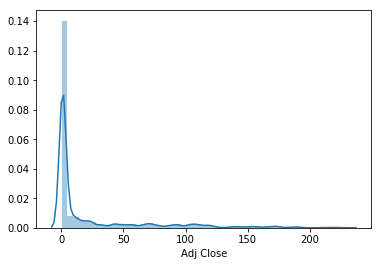

In [24]:
sns.distplot(data['Adj Close'])


In [27]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999958,0.999948,0.999907,0.999011,-0.076537
High,0.999958,1.000000,0.999936,0.999957,0.999042,-0.075296
Low,0.999948,0.999936,1.000000,0.999957,0.999128,-0.078624
Close,0.999907,0.999957,0.999957,1.000000,0.999130,-0.076956
Adj Close,0.999011,0.999042,0.999128,0.999130,1.000000,-0.087862
Volume,-0.076537,-0.075296,-0.078624,-0.076956,-0.087862,1.000000


In [30]:
x=data[['Open', 'High', 'Low', 'Close', 'Volume']]
y=data['Adj Close']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [34]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
predictions = lm.predict(X_test)

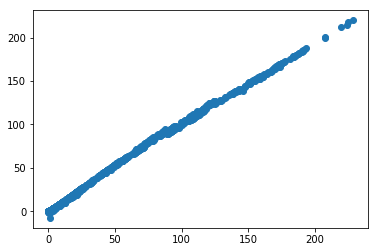

In [36]:
plt.scatter(y_test,predictions)